---
# **データマイニング特別演習　演習テーマ2**
## **【特許出願技術動向調査】認知工学に関する特許出願動向と技術開発動向の要約**
---

In [40]:
# ライブラリの読み込み
# %pip install --upgrade pip
# %pip install numpy
# %pip install matplotlib
# %pip install pandas
# %pip install openpyxl
# %pip install sympy
# %pip install scipy
# %pip install re
# %pip install jaconv
# %pip install scikit-learn
# %pip install statsmodels
# %pip install seaborn
# %pip install pmdarima
# %pip install kneed
# %pip install requests
# %pip install beautifulsoup4
# %pip install selenium
# %pip install pdfplumber
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module='seaborn')
warnings.filterwarnings("ignore", category=DeprecationWarning)
from matplotlib.font_manager import FontProperties
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
import sympy as sp
import scipy.stats as stats
import re
import jaconv 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import itertools
import matplotlib.dates as mdates
import pmdarima as pm
from IPython.display import clear_output
from sklearn.metrics import r2_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from kneed import KneeLocator
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import time
from matplotlib.ticker import LogLocator, LogFormatter
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
# from selenium.webdriver.edge.options import Options
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from selenium.webdriver.common.action_chains import ActionChains
import pdfplumber
from collections import defaultdict
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from PIL import Image

### 1. 背景・目的
　研究開発の初期・途中において，関連分野の技術開発動向・公知技術を調べることは重要であり，自身の強みを活かすために有望分野を見極め，他者との重複を避ける必要がある．そこで，自身の研究分野である“認知工学”に関して特許を調べ，特許マップ（要素別表示マップ，件数推移マップ，出願人ランキング）を作成し，技術開発動向の要約をまとめる．

### 2. 認知工学についての概要
　認知工学は，学術分野の一つであり，何か特定の技術というではないはないが，自身の研究関連で特許の取られている技術はなく，その多くが特許ではなく論文に掲載されている．  
　認知工学とは，人間が外界（周囲）を受容器をもって知覚し，脳をもって認知するメカニズムその強度を明らかにしたり，それを応用したりするための学問である．

### 3. 認知工学に関する特許案件
　[特許情報プラットフォーム（J-PlatPat）](https://www.j-platpat.inpit.go.jp/)より，“認知工学”のキーワードで全文検索を行い，そこからデータを抽出することを考える．動作の手順を以下にまとめる．
> URLにアクセス＞特許・実用新案の中の特許・実用新案検索＞キーワード“認知工学”を入力＞検索を実行＞スクリーンショット

In [41]:
# URLと出力ファイルのパスを設定
url = "https://www.j-platpat.inpit.go.jp/"
screenshot_path = "j-platpat_screenshot.png"
html_path = "j-platpat.html"
search_keywords = "認知工学"

# Chromeドライバの設定
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(options=options)
driver.set_window_size(1280, 900)

try:
    # URLにアクセス
    driver.get(url)
    time.sleep(1) 

    # 特許・実用新案の要素を取得
    hover_element_id = "cfc001_globalNav_item_0"
    hover_element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, hover_element_id))
    )

    # ActionChainsでホバー操作を実行
    actions = ActionChains(driver)
    actions.move_to_element(hover_element).perform()
    print(f"要素（ID: {hover_element_id}）にホバー")
    time.sleep(2)

    # 特許・実用新案検索を探してクリック
    button_id = "cfc001_globalNav_sub_item_0_1"
    button = driver.find_element("id", button_id)  # IDで要素を取得
    button.click()
    print(f"ボタン（ID: {button_id}）をクリック")
    time.sleep(1)

    # 検索ボックスまでスクロール
    search_box_id = "p01_main_txaSearchKeyword0"
    search_box = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, search_box_id))
    )
    driver.execute_script("arguments[0].scrollIntoView(true);", search_box)
    time.sleep(1)

    # 検索キーワードを入力
    search_box.clear()
    search_box.send_keys(search_keywords)
    print(f"検索ボックス（ID: {search_box_id}）に“{search_keywords}”と入力")
    time.sleep(1)

    # 検索ボタンまでスクロールしてクリック
    search_button_id = "p0101_main_btnSearch"
    search_button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.ID, search_button_id))
    )
    driver.execute_script("arguments[0].scrollIntoView(true);", search_button)
    time.sleep(1)

    # 検索を実行（ボタンをクリック）
    search_button.click()
    print(f"検索ボタン（ID: {search_button_id}）をクリック")
    time.sleep(1)

    # 検索結果までスクロール
    search_result_id = "patentUtltyIntnlSimpleBibLst"
    search_result = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, search_result_id))
    )
    driver.execute_script("arguments[0].scrollIntoView(true);", search_result)
    time.sleep(1)

    # ページ全体のスクリーンショットを保存
    driver.save_screenshot(screenshot_path)
    print(f"スクリーンショットを保存: {screenshot_path}")
    time.sleep(1)

    # HTMLソースを保存
    page_html = driver.page_source
    with open(html_path, "w", encoding="utf-8") as f:
        f.write(page_html)
    print(f"HTMLを保存: {html_path}")
    time.sleep(1)

finally:
    # ドライバの終了
    driver.quit()


要素（ID: cfc001_globalNav_item_0）にホバー
ボタン（ID: cfc001_globalNav_sub_item_0_1）をクリック
検索ボックス（ID: p01_main_txaSearchKeyword0）に“認知工学”と入力
検索ボタン（ID: p0101_main_btnSearch）をクリック
スクリーンショットを保存: j-platpat_screenshot.png
HTMLを保存: j-platpat.html


　以上より，J-PlatPatを用いて認知工学に関する特許・実用案件がいくつか存在することが確認できた．

### 4. 認知工学の構成要素と特許出願状況（要素別表示マップの作成）
　検索結果のページ中の分類コードランキングより，認知工学に関する特許がどのような分野により構成・応用されているのかまとめる．

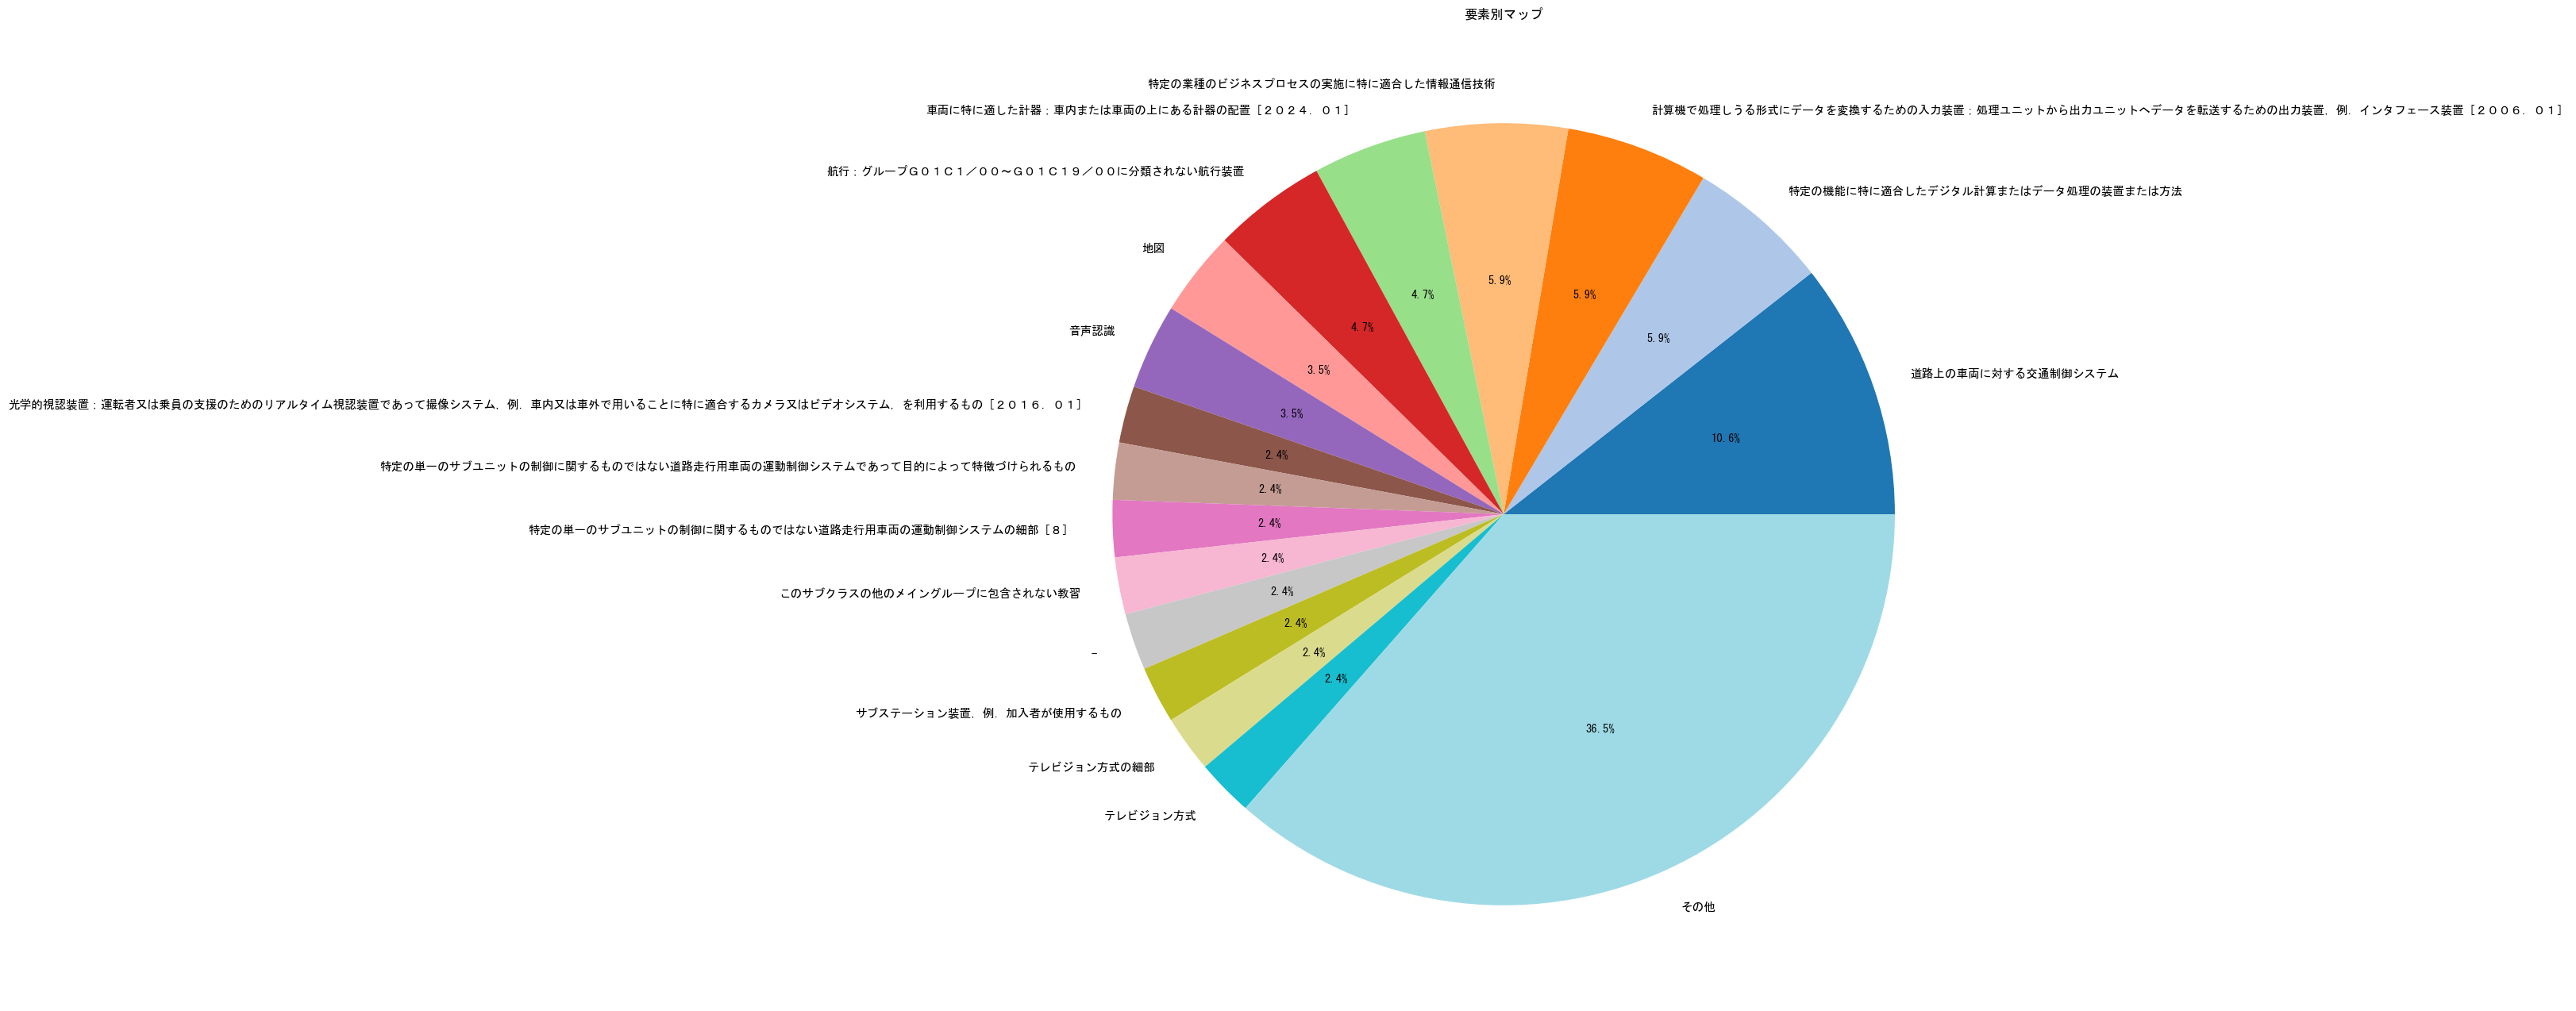

In [43]:
# Chromeドライバの設定
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(options=options)
driver.set_window_size(1280, 900)

# データの取得
try:
    # URLにアクセス
    driver.get(url)
    time.sleep(1) 

    # 特許・実用新案の要素を取得
    hover_element_id = "cfc001_globalNav_item_0"
    hover_element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, hover_element_id))
    )

    # ActionChainsでホバー操作を実行
    actions = ActionChains(driver)
    actions.move_to_element(hover_element).perform()
    time.sleep(2)

    # 特許・実用新案検索を探してクリック
    button_id = "cfc001_globalNav_sub_item_0_1"
    button = driver.find_element("id", button_id)  # IDで要素を取得
    button.click()
    time.sleep(1)

    # 検索ボックスまでスクロール
    search_box_id = "p01_main_txaSearchKeyword0"
    search_box = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, search_box_id))
    )
    driver.execute_script("arguments[0].scrollIntoView(true);", search_box)
    time.sleep(1)

    # 検索キーワードを入力
    search_box.clear()
    search_box.send_keys(search_keywords)
    time.sleep(1)

    # 検索ボタンまでスクロールしてクリック
    search_button_id = "p0101_main_btnSearch"
    search_button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.ID, search_button_id))
    )
    driver.execute_script("arguments[0].scrollIntoView(true);", search_button)
    time.sleep(1)

    # 検索を実行（ボタンをクリック）
    search_button.click()
    time.sleep(1)

    # 分類コードランキングまでスクロール
    ranking_button_id = "p0107_docDispScreenFormal_btnClassifyCodeRanking"
    ranking_button = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, ranking_button_id))
    )
    driver.execute_script("arguments[0].scrollIntoView(true);", ranking_button)
    time.sleep(1)

    # 分類コードランキングを表示
    ranking_button.click()
    time.sleep(1)

    # ウィンドウの切り替え
    main_window = driver.current_window_handle
    all_windows = driver.window_handles
    for window in all_windows:
        if window != main_window:
            driver.switch_to.window(window)
            break

    # データの取得
    table = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, "tableView.srchRsltLst.linetable-format-list"))
    )
    area = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, "p0119_classifyCodeRankTopArea"))
    )
    headers = [header.text for header in area.find_elements(By.TAG_NAME, "th")]
    rows = table.find_elements(By.TAG_NAME, "tr")
    data = []
    for row in rows[1:]:
        cols = row.find_elements(By.TAG_NAME, "td")
        data.append([col.text for col in cols])
    df = pd.DataFrame(data, columns=headers[1:])
    df.to_csv("ranking.csv", index=False, encoding="utf-8-sig")

finally:
    # ドライバの終了
    driver.quit()

#  要素別マップ（円グラフ）の作成
plt.rcParams['font.family'] = 'MS Gothic'
fig, ax = plt.subplots(figsize=(16, 16))
df['件数'] = df['件数'].str.split('/').str[0].astype(int)
df['説明'] = df['説明'].str.split('（').str[0]
others = df[df['件数'] == 1]
other_sum = others['件数'].sum()
df = df[df['件数'] > 1]
df = pd.concat([df, pd.DataFrame({'件数': [other_sum], '説明': ['その他']})], ignore_index=True)
colors = cm.get_cmap('tab20', len(df))
ax.pie(
    df['件数'],
    labels=df['説明'],
    autopct='%1.1f%%',
    colors=colors(np.arange(len(df))),
    textprops={'fontsize': 10.5}
)
plt.title('要素別マップ', fontsize=12, fontweight='bold')
plt.show()


以上より，認知工学はかなり多様な分野の特許の一部に考え方が応用されるというケースが多いことが可視化された．また，FIを見るとG，H，Bが多く，それぞれ物理学，電気，処理操作；運輸に関する特許が多いことがわかった．特にG06（計算または計数）が多く，人間の視覚の認知法をコンピュータやシステムに応用する動きが多いためであると考えられる．
### 5. 認知工学に関する特許件数推移マップ（年次推移）
　各年の認知工学に関する特許の出願件数の推移をグラフに示す．

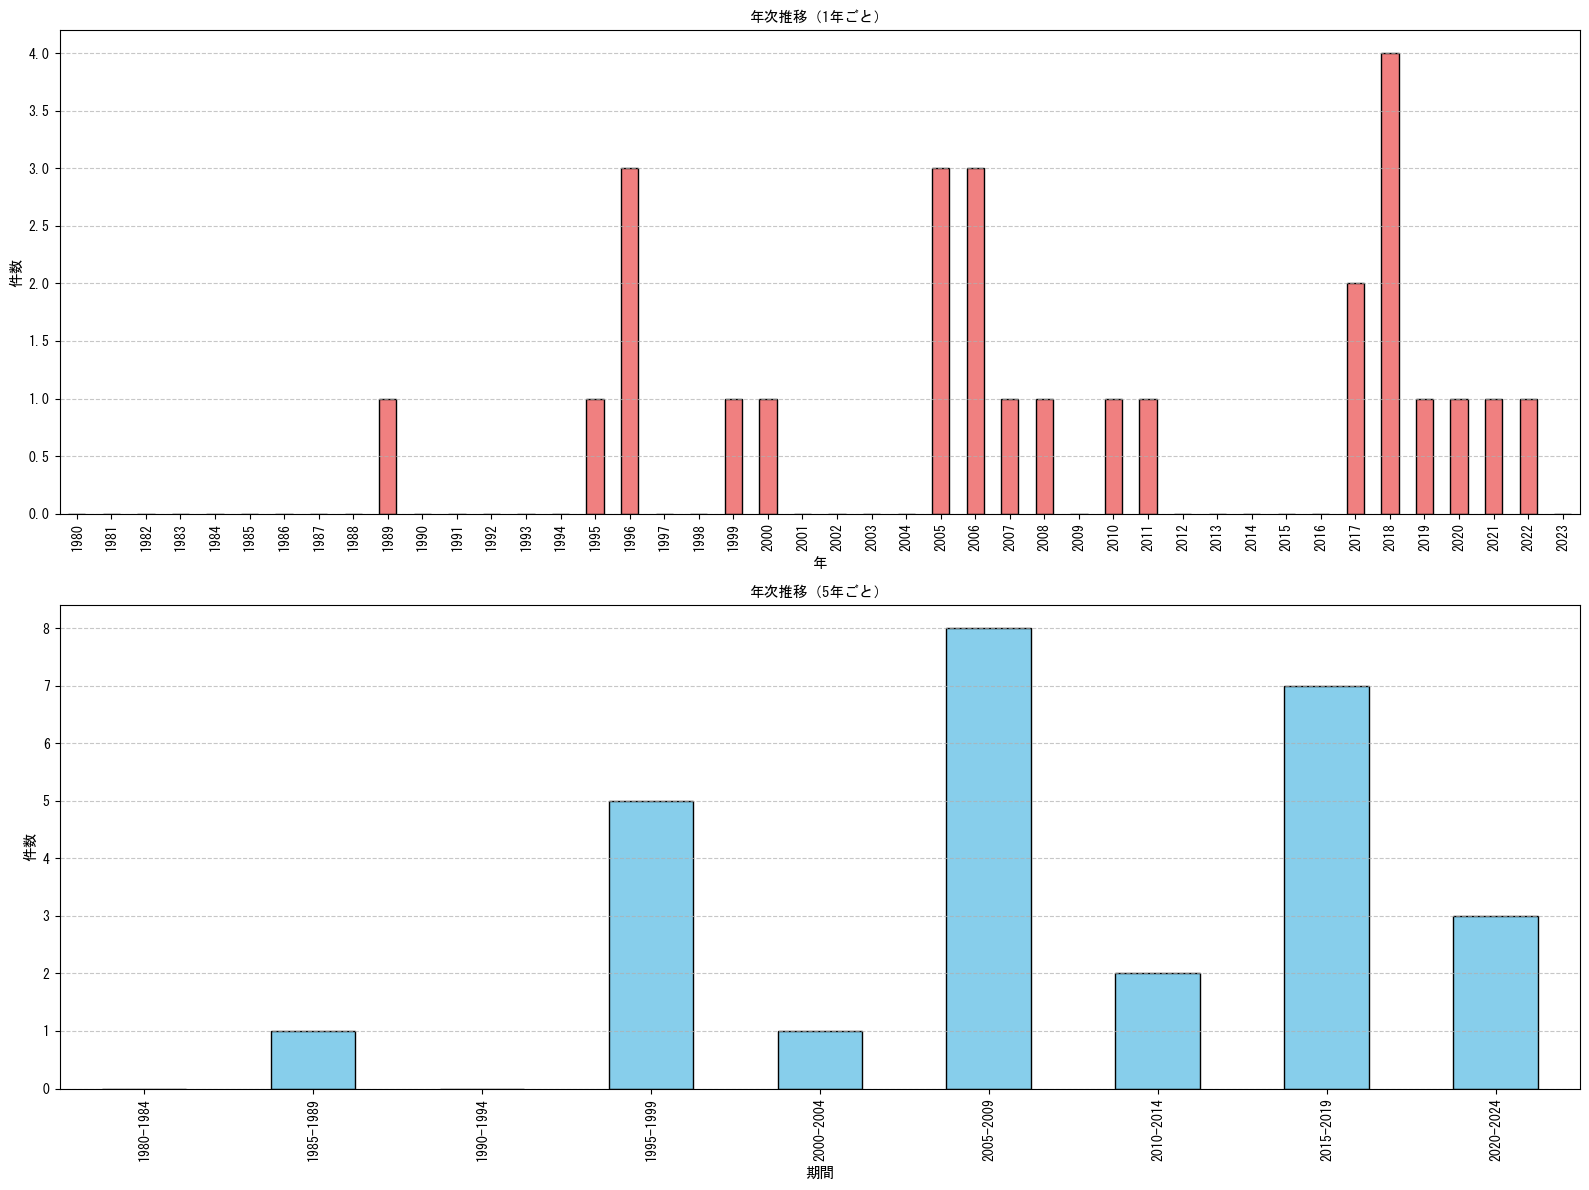

In [44]:
# Chromeドライバの設定
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(options=options)
driver.set_window_size(1280, 900)

# データの取得
try:
    # URLにアクセス
    driver.get(url)
    time.sleep(1) 

    # 特許・実用新案の要素を取得
    hover_element_id = "cfc001_globalNav_item_0"
    hover_element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, hover_element_id))
    )

    # ActionChainsでホバー操作を実行
    actions = ActionChains(driver)
    actions.move_to_element(hover_element).perform()
    time.sleep(2)

    # 特許・実用新案検索を探してクリック
    button_id = "cfc001_globalNav_sub_item_0_1"
    button = driver.find_element("id", button_id)  # IDで要素を取得
    button.click()
    time.sleep(1)

    # 検索ボックスまでスクロール
    search_box_id = "p01_main_txaSearchKeyword0"
    search_box = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, search_box_id))
    )
    driver.execute_script("arguments[0].scrollIntoView(true);", search_box)
    time.sleep(1)

    # 検索キーワードを入力
    search_box.clear()
    search_box.send_keys(search_keywords)
    time.sleep(1)

    # 検索ボタンまでスクロールしてクリック
    search_button_id = "p0101_main_btnSearch"
    search_button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.ID, search_button_id))
    )
    driver.execute_script("arguments[0].scrollIntoView(true);", search_button)
    time.sleep(1)

    # 検索を実行（ボタンをクリック）
    search_button.click()
    time.sleep(1)

    # データの取得
    table = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, "patentUtltyIntnlSimpleBibLst"))
    )
    rows = table.find_elements(By.TAG_NAME, "tr")
    data = []
    for row in rows[1:]:
        year_data = row.find_element(By.ID, "patentUtltyIntnlSimpleBibLst_tableView_appDateArea")
        data.append(year_data.text[:4])
    df = pd.DataFrame(data, columns=['year'])
    df.to_csv("j-platpat_year.csv", index=False, encoding="utf-8-sig")

finally:
    # ドライバの終了
    driver.quit()

# 年次推移のグラフ描画
df['year'] = df['year'].astype(int)
year_counts = df['year'].value_counts().sort_index()
year_counts = year_counts.reindex(list(range(1980, 2024)), fill_value=0)
bins = list(range(1980, 2030, 5))
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]
df['decade'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)
decade_counts = df['decade'].value_counts().sort_index()
plt.rcParams['font.family'] = 'MS Gothic'
fig, axes = plt.subplots(2, 1, figsize=(16, 12))
year_counts.plot(kind='bar', color='lightcoral', edgecolor='black', ax=axes[0])
axes[0].set_title('年次推移（1年ごと）', fontsize=10.5)
axes[0].set_xlabel('年', fontsize=10.5)
axes[0].set_ylabel('件数', fontsize=10.5)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
decade_counts.plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[1])
axes[1].set_title('年次推移（5年ごと）', fontsize=10.5)
axes[1].set_xlabel('期間', fontsize=10.5)
axes[1].set_ylabel('件数', fontsize=10.5)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


以上より，周期的変動はあるものの，認知工学に関する特許件数は増加傾向にあることがわかる．しかし，件数的には未だブルーオーシャンな分野であり他者との競合は弱い考えられ，時間をかけて研究できる点は良いといえる．一方で，完全に独立したマニアックな分野であるというわけではなく，人間の認知に関わる分野であるため，近年発展に期待が持たれているAI（ネットワーク・学習法）やハプティクスに関する技術へ応用することができ，十分に有望な研究分野であるといえる．

### 6. 認知工学に関する特許出願人ランキング
　最後に，特許出願人ランキングをまとめる．

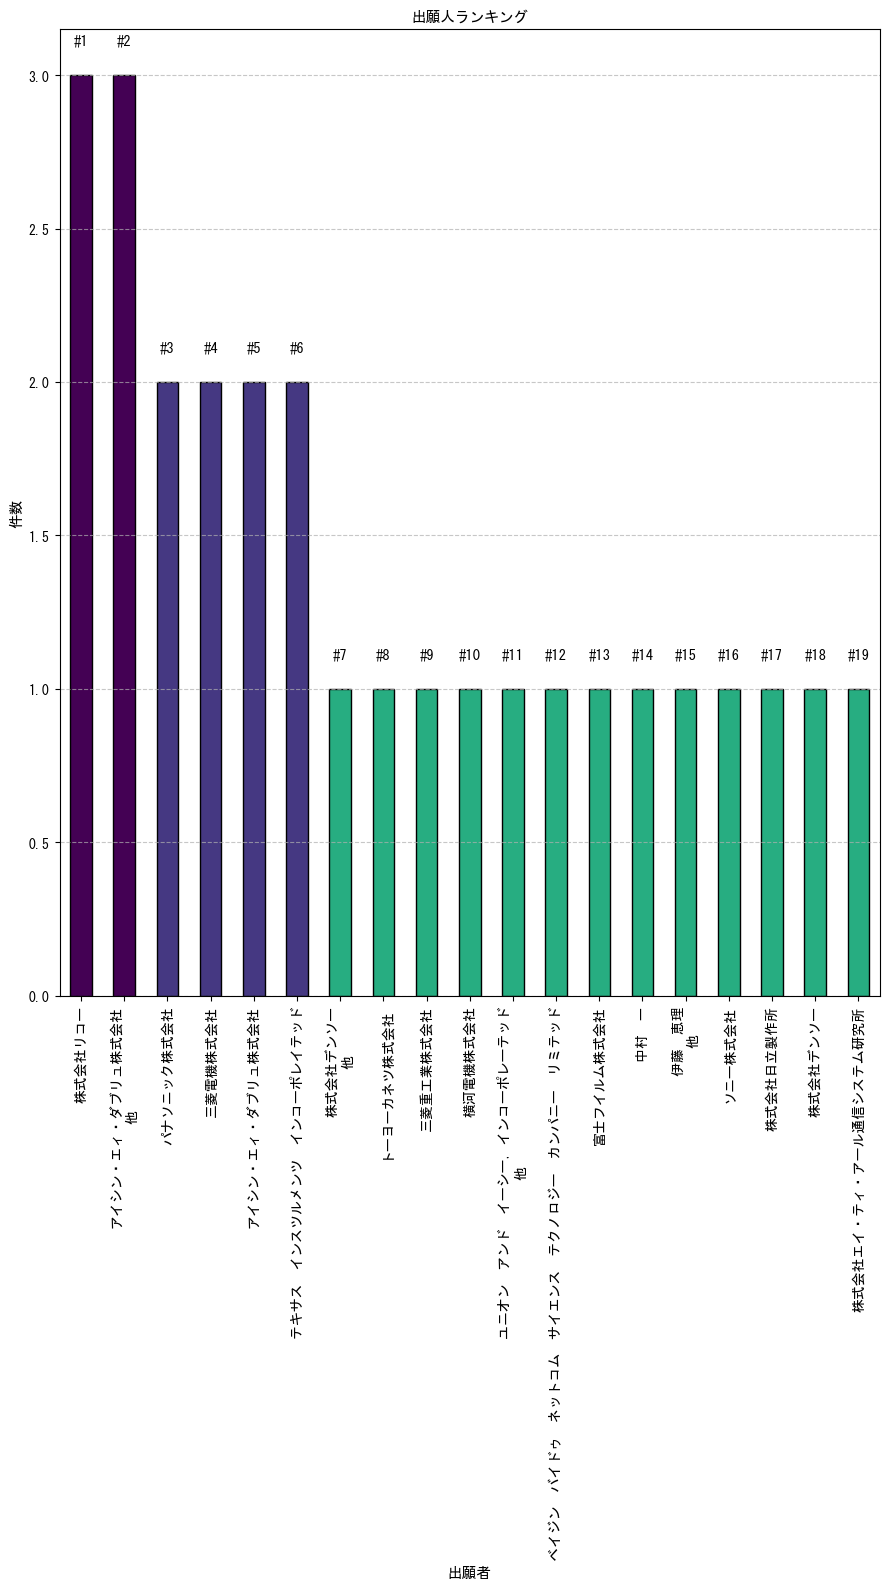

In [51]:
# Chromeドライバの設定
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(options=options)
driver.set_window_size(1280, 900)

# データの取得
try:
    # URLにアクセス
    driver.get(url)
    time.sleep(1) 

    # 特許・実用新案の要素を取得
    hover_element_id = "cfc001_globalNav_item_0"
    hover_element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, hover_element_id))
    )

    # ActionChainsでホバー操作を実行
    actions = ActionChains(driver)
    actions.move_to_element(hover_element).perform()
    time.sleep(2)

    # 特許・実用新案検索を探してクリック
    button_id = "cfc001_globalNav_sub_item_0_1"
    button = driver.find_element("id", button_id)  # IDで要素を取得
    button.click()
    time.sleep(1)

    # 検索ボックスまでスクロール
    search_box_id = "p01_main_txaSearchKeyword0"
    search_box = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, search_box_id))
    )
    driver.execute_script("arguments[0].scrollIntoView(true);", search_box)
    time.sleep(1)

    # 検索キーワードを入力
    search_box.clear()
    search_box.send_keys(search_keywords)
    time.sleep(1)

    # 検索ボタンまでスクロールしてクリック
    search_button_id = "p0101_main_btnSearch"
    search_button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.ID, search_button_id))
    )
    driver.execute_script("arguments[0].scrollIntoView(true);", search_button)
    time.sleep(1)

    # 検索を実行（ボタンをクリック）
    search_button.click()
    time.sleep(1)

    # データの取得
    table = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, "patentUtltyIntnlSimpleBibLst"))
    )
    rows = table.find_elements(By.TAG_NAME, "tr")
    data = []
    for row in rows[1:]:
        holder_data = row.find_element(By.ID, "patentUtltyIntnlSimpleBibLst_tableView_appnRightHolderArea")
        data.append(holder_data.text)
    df = pd.DataFrame(data, columns=['holder'])
    df.to_csv("j-platpat_holder.csv", index=False, encoding="utf-8-sig")

finally:
    # ドライバの終了
    driver.quit()

# 出願人ランキングの描画
holder_counts = df['holder'].value_counts().sort_values(ascending=False)
plt.rcParams['font.family'] = 'MS Gothic'
fig, ax = plt.subplots(figsize=(9, 16))
normalized_ranks = 1 - (holder_counts.rank(ascending=True) / holder_counts.rank(ascending=True).max())
colors = plt.cm.viridis(normalized_ranks)
holder_counts.plot(
    kind='bar', 
    color=colors, 
    edgecolor='black', 
    ax=ax
)
for i, (name, count) in enumerate(holder_counts.items()):
    ax.text(i, count + 0.1, f'#{i+1}', ha='center', fontsize=10.5)
ax.set_title('出願人ランキング', fontsize=10.5)
ax.set_xlabel('出願者', fontsize=10.5)
ax.set_ylabel('件数', fontsize=10.5)
ax.tick_params(axis='x', rotation=90)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

　出願人ランキングのトップは，株式会社リコーとアイシン・エイ・ダブリュ株式会社が3件で並んだ．株式会社リコーはデジタル機器や社内インフラに関する製品を開発しており，認知工学的な観点からヒトに優しい設計を行っているものと考えらえる．アイシン・エイ・ダブリュ株式会社は，車両運転補助システムの開発を行っており，認知工学的な観点からヒトが車両を運転する代わりとなる（それを再現する）ソフトウェア開発を行っているものと考えられる．


### 感想  
　個人的に認知工学に関する研究に対して行き詰まっていたが，これをきっかけに認知工学の現状と将来性を言語化することで，視野が広がり，研究に対する自信と方向性を取り戻すことができた．また，AIと認知工学の関わりは個人的に興味があり，認知工学的な観点から有用なネットワークやモデルを提案できたら良いと思った．